<a href="https://colab.research.google.com/github/ansh-tandon/GDSC-Task-AI-/blob/main/GDSC_Task(AI).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##  CLASSIFICATION PROBLEM : MNIST DATASET 
## AUTHOR: Ansh Tandon

In [2]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 167.3/167.3 KB 4.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 29.1 MB/s eta 0:00:00


In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [4]:
print(tf.__version__)

2.11.0


In [5]:
fashion_mnist=keras.datasets.fashion_mnist

In [6]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [7]:
#Convert the images to 0 and 1
train_images=train_images/255.0
test_images=test_images/255.0

In [8]:
#usually the images are in 3D format dimensions(height,width,channels) but see
train_images[0].shape
#so we need to reshape the Fashion-MNIST dataset to have an additional dimension for the channels, since CNNs expect image data to be in the form of (height, width, channels). In the case of the Fashion-MNIST dataset, since the images are grayscale, we can represent them with a single channel.

(28, 28)

In [9]:
#reshape the model
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)

In [10]:
#In order to create a CNN model make a Sequential Layer and add Conv2d LAYER and other hidden layers
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        #relu returns the input if positive(leaves positive values unchanged) and 0 if negative and is effective for image classification tasks
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
     #flattening a layer is imp to get the output in 1D array as we want to pass the output to the FUully connected layer
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
   #SOFTMAX return the graph of probability distribution of taken input values 
    keras.layers.Dense(10, activation='softmax')
  ])
  #AdAM OPTIMIZER used for minimizing the loss function
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
         #Sparse entropy for generally image classification problems      
              metrics=['accuracy'])
  
  return model

In [11]:
# Using RandomSearch to find out which Hyperparameter is best for MNIST dataset
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

<ipython-input-11-61ed745f13fd>:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [12]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")

In [13]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 00m 42s]
val_accuracy: 0.9123333096504211

Best val_accuracy So Far: 0.9123333096504211
Total elapsed time: 00h 03m 18s


In [14]:
#In order to get the top most model performing
model=tuner_search.get_best_models(num_models=1)[0]

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 64)        1664      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 64)        36928     
                                                                 
 flatten (Flatten)           (None, 30976)             0         
                                                                 
 dense (Dense)               (None, 48)                1486896   
                                                                 
 dense_1 (Dense)             (None, 10)                490       
                                                                 
Total params: 1,525,978
Trainable params: 1,525,978
Non-trainable params: 0
_________________________________________________________________


In [16]:
#Retrain the model using the best model
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=8)

Epoch 9/10
1688/1688 [==============================] - 10s 5ms/step - loss: 0.1701 - accuracy: 0.9368 - val_loss: 0.2520 - val_accuracy: 0.9102
Epoch 10/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.1328 - accuracy: 0.9511 - val_loss: 0.2873 - val_accuracy: 0.9047


In [17]:
# saving thee file in h5 model

# REGRESSION PROBLEM: Churn customer
# LOGISTIC REGRESSION

In [27]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [29]:
import pandas as pd
cust_df = pd.read_csv('/content/drive/My Drive/Social_Network_Ads.csv')

In [30]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [31]:
print(cust_df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


In [32]:
cust_df.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [33]:
#to get the information about the dataset
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [34]:
# Checking if any null values present or not
cust_df.isnull()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
395,False,False,False,False,False
396,False,False,False,False,False
397,False,False,False,False,False
398,False,False,False,False,False


<Axes: >

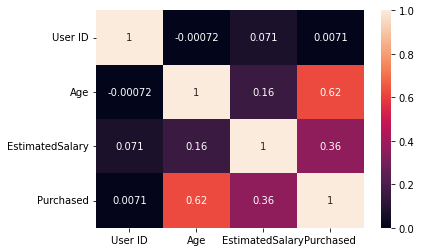

In [35]:
sns.heatmap(cust_df.corr(),vmin=0,vmax=1,annot=True)

In [36]:
#Selecting a particular column through slicing
df1=cust_df.iloc[:,2:]
print(df1)



     Age  EstimatedSalary  Purchased
0     19            19000          0
1     35            20000          0
2     26            43000          0
3     27            57000          0
4     19            76000          0
..   ...              ...        ...
395   46            41000          1
396   51            23000          1
397   50            20000          1
398   36            33000          0
399   49            36000          1

[400 rows x 3 columns]


In [37]:
#Count the number of Male and Female
cust_df.Gender.value_counts()

Female    204
Male      196
Name: Gender, dtype: int64

In [38]:
#Predicting whether the customer will purchase(0) or not(1)
X_features=list(cust_df.columns)
X_features.remove('Purchased')
X_features

['User ID', 'Gender', 'Age', 'EstimatedSalary']

# DATA VISUALIZATION

<Axes: xlabel='Purchased', ylabel='count'>

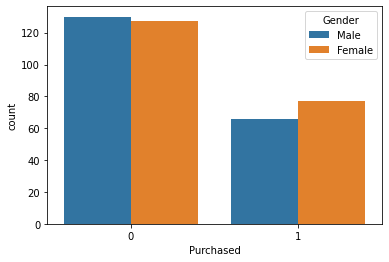

In [39]:
#Predicting that how many male and female purchased the Product based on gender
sns.countplot(x='Purchased',hue='Gender',data=cust_df)

35    32
37    20
26    16
41    16
42    16
39    15
40    15
48    14
47    14
27    13
38    13
28    12
36    12
46    12
31    11
30    11
49    10
29    10
33     9
32     9
24     9
59     7
19     7
45     7
20     7
60     7
34     6
23     6
52     6
25     6
58     6
53     5
57     5
22     5
18     5
21     4
50     4
54     4
55     3
56     3
51     3
43     3
44     2
Name: Age, dtype: int64

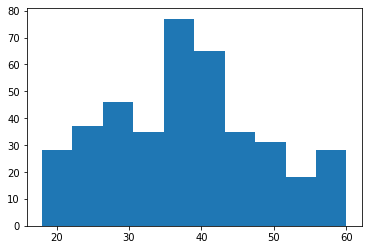

In [40]:
#Predicting the age of all the people through histogram as well as countplot
plt.hist(cust_df['Age'])
cust_df.Age.value_counts()

<ipython-input-41-8fa8ce0da738>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(cust_df['EstimatedSalary'])


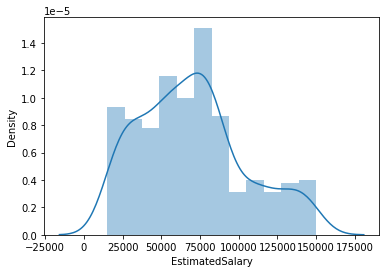

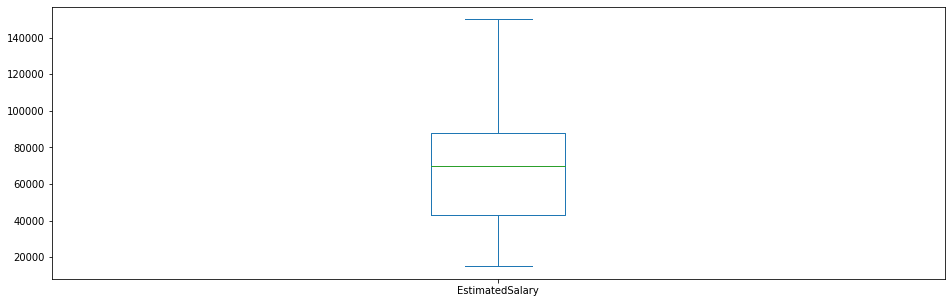

In [41]:
sns.distplot(cust_df['EstimatedSalary'])
plt.show()
cust_df['EstimatedSalary'].plot.box(figsize=(16,5))
plt.show()

<Axes: xlabel='EstimatedSalary', ylabel='count'>

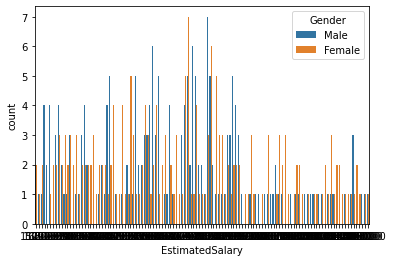

In [42]:
sns.countplot(x='EstimatedSalary',hue='Gender',data=cust_df)

Building a Regression Model 

In [43]:
# ENCODING CATEGORIAL DATA AND HANDLING USING DUMMY VARIABLES
#This is called multicollinearity and it significantly reduces the predictive power of your algorithm. To remove this, we can add the argument drop_first = True to the get_dummies method like this:
cust_df['Gender'].replace('Male',0,inplace=True)
cust_df['Gender'].replace('Female',1,inplace=True)

In [44]:
#As of now no missing values are being found in the dataset so no missing values
cust_df.drop(['User ID'], axis = 1, inplace = True)

# FEATURE SCALING

In [45]:
from sklearn.model_selection import train_test_split
x=cust_df[['Gender','Age','EstimatedSalary']]
y=cust_df['Purchased']

In [46]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3)

In [47]:
#here feature scaling is necessary as we won't be able to predict the correct data as the Salary category will dominate 
from sklearn.preprocessing import StandardScaler
modelx=StandardScaler()
x_train =modelx.fit_transform(x_train) 
x_test =modelx.fit_transform(x_test)


In [48]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [49]:

predictions = model.predict(x_test)

# PERFORMANCE & ACCURACY

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import classification_report
classification_report(y_test, predictions)


'              precision    recall  f1-score   support\n\n           0       0.84      0.93      0.88        76\n           1       0.86      0.68      0.76        44\n\n    accuracy                           0.84       120\n   macro avg       0.85      0.81      0.82       120\nweighted avg       0.84      0.84      0.84       120\n'

In [52]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, predictions))

[[71  5]
 [14 30]]


In [53]:
print(classification_report(y_test,predictions))
cm=confusion_matrix(y_test,predictions)
print(cm)
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.93      0.88        76
           1       0.86      0.68      0.76        44

    accuracy                           0.84       120
   macro avg       0.85      0.81      0.82       120
weighted avg       0.84      0.84      0.84       120

[[71  5]
 [14 30]]
0.8416666666666667
